# MovieLens 100k data set exploration

This notebook has the objective of visualizing and exploring the information stored in the MovieLens 100k [http://www.movielens.org/] data set provided by the GroupLens Project [http://www.grouplens.org/] in 1998

    Herlocker, J., Konstan, J., Borchers, A., Riedl, J.. An Algorithmic
    Framework for Performing Collaborative Filtering. Proceedings of the
    1999 Conference on Research and Development in Information
    Retrieval. Aug. 1999.

While exploring the dataset, numerous algorithms will be implemented in a MovieLens100K Data Loading class to simplfy the process of exploring the dataset later

In [197]:
import numpy as np
import pandas as pd
import torch as th
import os
from datetime import timedelta
from datetime import datetime
import requests
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Download Data

In [198]:
data_dir='../../data/ml-100k/raw/ml-100k'
os.listdir(data_dir)

['u4.test',
 'u3.test',
 'u3.base',
 'ub.base',
 'README',
 'u2.test',
 'ub.test',
 'u.occupation',
 'u.user',
 'u.item',
 'ua.test',
 'u4.base',
 'u.data',
 'u1.test',
 'u1.base',
 'allbut.pl',
 'u.info',
 'mku.sh',
 'u.genre',
 'u5.base',
 'u5.test',
 'u2.base',
 'ua.base']

In [199]:
if os.path.exists(data_dir) == False:
    cwd=os.getcwd()
    os.chdir(data_dir)
    url='https://files.grouplens.org/datasets/movielens/ml-100k.zip'
    print('\r','Downloading Started', end='')
    # Downloading the file by sending the request to the URL
    req = requests.get(url)
    # Split URL to get the file name
    filename = url.split('/')[-1]
    download_path=os.getcwd()+'/'+filename
    print('\r',f'saving zip to {download_path}', end='\n')
    # Writing the file to the local file system
    with open(download_path,'wb') as output_file:
        output_file.write(req.content)
        os.system(f'unzip ml-100k.zip')
    print('\r','Downloading Completed', end='\n')
    os.chdir(cwd)

# Load DataFrames

1. ratings_df
    - the user movie interaction data
2. info_df 
    - the count measurements of the data set
3. genre_df
    - the genre name and id mapping
4. occupation_df
    -  the occupation name and id mapping
5. item_df
    - the movie infomation data
6. user_df
    - the user information data

In [200]:
# ratings data
columns_name=['user_id','item_id','rating','timestamp']
ratings_df = pd.read_csv(f"{data_dir}/u.data",sep="\t",names=columns_name)
ratings_df


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [201]:
# data info
info_df = pd.read_csv(f"{data_dir}/u.info", sep=" ", header=None)
info_df.columns=['Counts', 'Type']
info_df


,Counts,Type
0,943,users
1,1682,items
2,100000,ratings


In [202]:
# movie genres
column_names=['genre', 'genre_id']
genre_df = pd.read_csv(f"{data_dir}/u.genre", sep="|", encoding='latin-1', header=None, names=column_names)
genre_df



,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [203]:
#occupation data
occupation_df = pd.read_csv(f"{data_dir}/u.occupation", sep="|", encoding='latin-1', header=None, names=['occupation'])
occupation_df=occupation_df.reset_index().rename(columns={'index': 'occupation_id'})
occupation_df


,occupation_id,occupation
0,0,administrator
1,1,artist
2,2,doctor
3,3,educator
4,4,engineer
5,5,entertainment
6,6,executive
7,7,healthcare
8,8,homemaker
9,9,lawyer


In [204]:
#item data
column_names = ['movie_id', 'movie_title' ,'release_date','video_release_date', 'IMDb_URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item_df = pd.read_csv(f"{data_dir}/u.item", sep="|", encoding='latin-1', header=None, names=column_names)
item_df

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
#user data
column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user_df = pd.read_csv(f"{data_dir}/u.user", sep="|", encoding='latin-1', header=None, names=column_names)
user_df


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


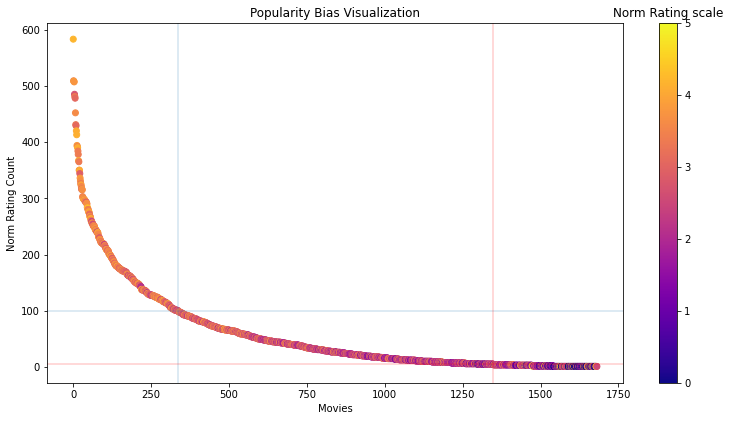

In [234]:
from matplotlib.cm import ScalarMappable

movie_rating_counts=ratings_df['item_id'].value_counts().to_dict()
avg_ratings = []

for m_id, rating_count in movie_rating_counts.items():
    avg_ratings.append(sum(ratings_df[ratings_df['item_id']==m_id]['rating'].values)/movie_rating_counts[m_id])

# max_rating=max(avg_ratings)
# min_rating=min(avg_ratings)
# mean_rating=sum(avg_ratings)/len(avg_ratings)

# norm_avg_ratings=[(x-mean_rating/(max_rating-min_rating)) for x in avg_ratings]


y=ratings_df['item_id'].value_counts().values
x=range(len(y))
fig=plt.Figure(figsize=(10,5))
fig.patch.set_facecolor('white')
ax=fig.add_axes([0,0,1,1])

line1_index=round(len(x)*.2)
line2_index=round(len(x)*.8)
ax.axvline(line1_index, alpha=0.2)
ax.axhline(y[line1_index], alpha=0.2)
ax.axvline(line2_index,c='r', alpha=0.2)
ax.axhline(y[line2_index],c='r', alpha=0.2)

ax.scatter(x, y, c=avg_ratings, cmap='plasma')
ax.set_xlabel('Movies')
ax.set_ylabel('Norm Rating Count')
ax.set_title('Popularity Bias Visualization')
scales = np.linspace(0, 5, 10)
norm = plt.Normalize(scales.min(), scales.max())
sm =  ScalarMappable(norm=norm, cmap='plasma')
fig.colorbar(sm).ax.set_title("Norm Rating scale")
fig

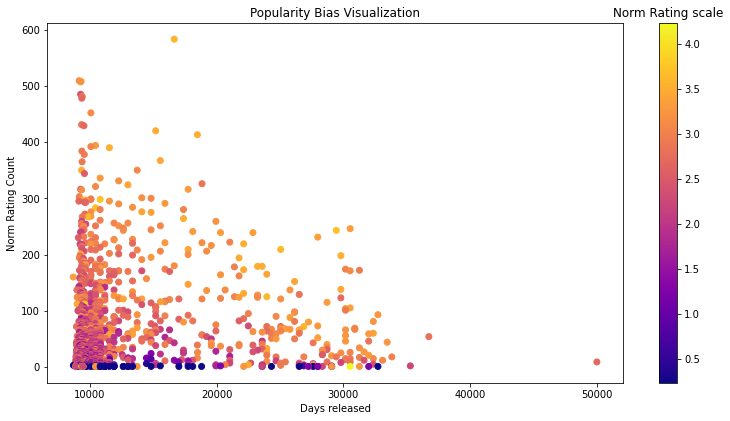

In [207]:
from matplotlib.cm import ScalarMappable

movies_days_released=[]

for item in ratings_df['item_id'].value_counts().index:
    item_release_datetime_date=pd.to_datetime(item_df[item_df['movie_id']==item]['release_date'].values[0]).date()
    try:
        days_released=(datetime.now().date()-item_release_datetime_date).days
    except:
        days_released=50000
    movies_days_released.append(days_released)

movie_rating_counts=ratings_df['item_id'].value_counts().to_dict()
avg_ratings = []

for m_id, rating_count in movie_rating_counts.items():
    avg_ratings.append(sum(ratings_df[ratings_df['item_id']==m_id]['rating'].values)/movie_rating_counts[m_id])

max_rating=max(avg_ratings)
min_rating=min(avg_ratings)
mean_rating=sum(avg_ratings)/len(avg_ratings)

norm_avg_ratings=[(x-mean_rating/(max_rating-min_rating)) for x in avg_ratings]

y=ratings_df['item_id'].value_counts().values
x=movies_days_released
fig=plt.Figure(figsize=(10,5))
fig.patch.set_facecolor('white')
ax=fig.add_axes([0,0,1,1])

line1_index=round(len(x)*.2)
line2_index=round(len(x)*.8)
# ax.axvline(line1_index, alpha=0.2)
# ax.axhline(y[line1_index], alpha=0.2)
# ax.axvline(line2_index,c='r', alpha=0.2)
# ax.axhline(y[line2_index],c='r', alpha=0.2)

ax.scatter(x, y, c=norm_avg_ratings, cmap='plasma')
# ax.scatter(x, y)

ax.set_xlabel('Days released')
ax.set_ylabel('Norm Rating Count')
ax.set_title('Popularity Bias Visualization')
scales = np.linspace(min(norm_avg_ratings), max(norm_avg_ratings), 10)
norm = plt.Normalize(scales.min(), scales.max())
sm =  ScalarMappable(norm=norm, cmap='plasma')
fig.colorbar(sm).ax.set_title("Norm Rating scale")
fig

In [208]:
# male_ratings
user_ratings_df = ratings_df.join(user_df.set_index('user_id'), on='user_id')
male_user_ratings_df=user_ratings_df[user_ratings_df['gender']=='M']


In [231]:
def make_user_count_plot_w_norm_rating(df, title, xlabel, ylabel, colorbar_title):
    user_rating_counts=df['user_id'].value_counts().to_dict()
    avg_user_ratings = []

    for u_id, rating_count in user_rating_counts.items():
        avg_user_ratings.append(sum(df[df['user_id']==u_id]['rating'].values)/user_rating_counts[u_id])

    # max_rating=max(avg_user_ratings)
    # min_rating=min(avg_user_ratings)
    # mean_rating=sum(avg_user_ratings)/len(avg_user_ratings)

    # norm_avg_user_ratings=[(x-mean_rating/(max_rating-min_rating)) for x in avg_user_ratings]

    y=df['user_id'].value_counts().values
    x=range(len(y))
    fig=plt.Figure(figsize=(10,5))
    fig.patch.set_facecolor('white')
    ax=fig.add_axes([0,0,1,1])

    line1_index=round(len(x)*.2)
    line2_index=round(len(x)*.8)
    ax.axvline(line1_index, alpha=0.2)
    ax.axhline(y[line1_index], alpha=0.2)
    ax.axvline(line2_index,c='r', alpha=0.2)
    ax.axhline(y[line2_index],c='r', alpha=0.2)

    ax.scatter(x, y, c=avg_user_ratings, cmap='plasma')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    scales = np.linspace(0, 5, 10)
    norm = plt.Normalize(scales.min(), scales.max())
    sm =  ScalarMappable(norm=norm, cmap='plasma')
    fig.colorbar(sm).ax.set_title(colorbar_title)

    return fig


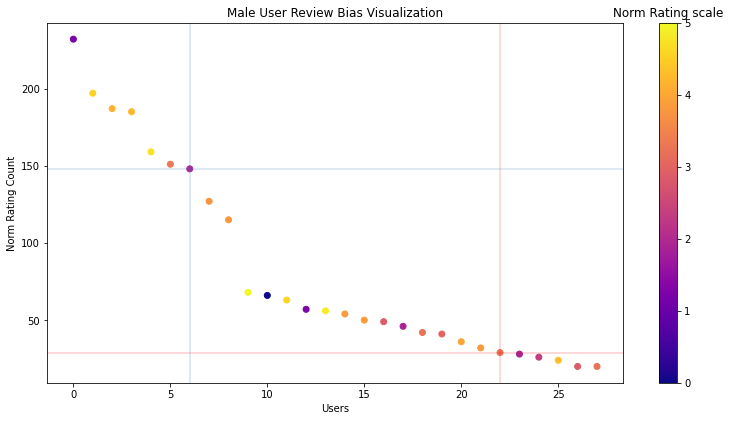

In [232]:
make_user_count_plot_w_norm_rating(df=user_ratings_df[user_ratings_df['occupation']=='artist'], title='Male User Review Bias Visualization', xlabel='Users', ylabel='Norm Rating Count', colorbar_title="Norm Rating scale")